In [1]:
%load_ext autoreload
%autoreload 2

import itertools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

import os

import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch

import renyi
import utils
import sxp

### Entropy on a metric space with two points

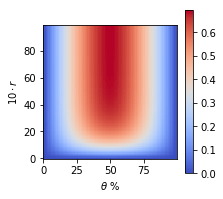

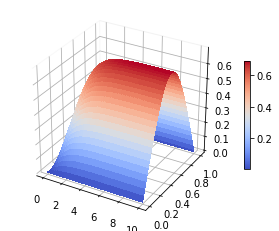

In [71]:
rs = np.linspace(0, 10, 100)
thetas = np.linspace(0, 1, 100)

res = np.zeros((len(rs), len(theta)))
for i, r_val in enumerate(rs):
    for j, theta_val in enumerate(thetas):
        K = torch.tensor([[1, np.exp(-r_val)],
                          [np.exp(-r_val), 1]])
        p = torch.tensor([[theta_val, 1-theta_val]])
        res[i, j] = renyi.renyi_sim_entropy(K, p, 2)
        
        
fig = plt.figure(figsize=(3, 3))
s = fig.add_subplot(1, 1, 1, xlabel='$\\theta$ %', ylabel='$10 \cdot r$')
im = s.imshow(res, origin='lower', cmap=cm.coolwarm)
plt.grid(False)
fig.colorbar(im)
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = fig.gca(projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
X, Y = np.meshgrid(thetas, rs)
surf = ax.plot_surface(Y, X, res, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=20)
plt.show()